<a href="https://colab.research.google.com/github/MLRG-CEFET-RJ/ml-class/blob/master/DataMining_week09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification task: an overview

As a recap, remember that Data Mining techniques can be categorized in two types: descriptive and predictive (see figure below).

![alt text](https://www.researchgate.net/profile/Ali_Al-Haboobi/publication/317731072/figure/fig1/AS:507840017645568@1498089903893/Data-mining-techniques_W640.jpg)

Classification is a predictive task in which the features of the dataset are divided into two groups. One of the groups contains only one feature, which is called the *target*, that is, the feature for which a value must be predicted. In the case of the classification task, the target is categorical (i.e. its domain is composed of categories/classes). The other group contains the features to be used in the prediction of the target, called *predictive features* (or simply *predictors*). Each row of the dataset is called an *example* (aka *instance* or *case*)

The image below ([source](https://docs.oracle.com/cd/B28359_01/datamine.111/b28129/classify.htm#DMCON004)) shows a toy dataset suited for the classification task. In this example, notice that the target has only two possible values, which configures a *binary classification task*.

![alt text](https://docs.oracle.com/cd/B28359_01/datamine.111/b28129/img/class_sampledata.gif)

The classification task can be understood as the search for a *classification function* (aka *predictive model* or simply *model*) that allows each instance to be correctly associated with one or more categorical labels (or classes). The examples in the original dataset are initially split into two parts, the *training dataset* and the *test dataset*. The search for the classification function is done by a *learning algorithm* (aka *classificaion algorithm*), which process the training dataset. During this search, we say the algorithm is *learning a model* or *fitting a model*. Once the model is built, its predictive performance is evaluated using the examples in the test dataset. This evaluation will give us an estimate of how good the model is in predicting the class for unseen examples. After being evaluated, the model can be applied to new cases in order to predict their classes. The figure below ([source](https://www.researchgate.net/publication/317731072_Popular_Decision_Tree_Algorithms_of_Data_Mining_Techniques_A_Review)) provides an overview of this process.

![alt text](https://www.researchgate.net/profile/Ali_Al-Haboobi/publication/317731072/figure/fig2/AS:507840016154625@1498089904007/Classification-task-steps_W640.jpg)

As an example, consider a finance company that stores data about its customers and their behavior in relation to the payment of previously contracted loans. Also consider three types (classes) of customers: *risky*, *low*, and *safe*. These are the classes of the problem (i.e., the values ​​of the target feature). An application of the Classification task, in this case, consists of applying a learning algorithm to discover a function that correctly maps customers, based on their data (i.e., the values ​​of the predictive features), in one of these classes. 

The image below ([source](http://greatislamians.blogspot.com/p/data-mining-classification-prediction.html)) illustrates the example described above. This image presents a particular type of classification funtion, which is comprised of a set of classification rules. In general, each classification algorithm has its particular way of representing classification functions.

![alt text](http://www.tutorialspoint.com/data_mining/images/dm_build_classifier.jpg)

Continuing the example about customers, once discovered, the model can be used to predict the behavior of new customers who wish to borrow from the finance company. This model can be actually incorporated into a decision support system that assists in filtering and granting loans only to customers classified as good payers, as the image below ([source](http://greatislamians.blogspot.com/p/data-mining-classification-prediction.html)) illustrates. 

![alt text](http://www.tutorialspoint.com/data_mining/images/dm_using_classifier.jpg)

In this notebook, we will study some of the many available classification algorithms. In particular, the following algorithms are described here for carrying out the classification task:

- Logistic regression
- $k$-nearest neighbors
- Decision trees
- Naive Bayes classifier

In the following sections, consider the following notation:

- $\mathbf{x}$ is an instance whose class is to be determined.
- $m$ is the size of the training set.
- $n$ is the number of predictive features. 
- $k$ is the number of classes (values) of the target feature.
- $\mathbf{x}^{(i)} \in \Re^{n}$ is a vector that represents the $i$-th training example.
- $y^{(i)}$ is the target feature value for the $i$-th training example.
- $X = \{\mathbf{x}^{(i)}, y^{(i)}\}_{i = 1}^{m}$ is the training dataset.

# Examples in a dataset: a geometric interpretation

A common characteristic of many Data Mining algorithms (for classification and for other tasks) is that they interpret each example in a dataset as a *geometric point*. See the following figure (taken from [here](https://www.mathplanet.com/education/geometry/points,-lines,-planes-and-angles/an-introduction-to-geometry)). 

![three points in 2D](https://www.mathplanet.com/Oldsite/media/43053/picture04.png)

To get a sense of this interpretation, consider a ficticious dataset for binary classification with 17 examples. Furthermore, for simplicity´s sake, consider that each example has only two features, which means that each example is of the form $\mathbf{x} = [x_1, x_2]$. The code cell below presents this dataset as two separated numpy arrays, $X$ and $y$.

In [ ]:
import numpy as np

X = np.array([[-0.1, 1.4],
              [-0.5,-0.1],
              [ 1.3, 0.9],
              [-0.6, 0.4],
              [-1.5, 0.4],
              [ 0.2, 0.2],
              [-0.3,-0.4],
              [ 0.7,-0.8],
              [ 1.1,-1.5],
              [-1.0, 0.9],
              [-0.5,-1.5],
              [-1.3,-0.4],
              [-1.4,-1.2],
              [-0.9,-1.1],
              [ 0.4,-1.3],
              [-0.4, 0.6],
              [ 0.3,-0.5]])

y = np.array([0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1])

Since each example is represented by a pair of numbers, we can plot these examples for visualization purposes.

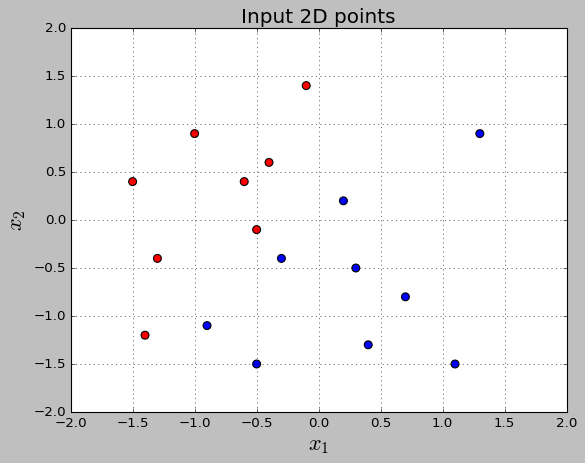

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')
np.set_printoptions(precision=3, suppress=True)

colormap = np.array(['r', 'b'])

def plot_scatter(X, y, colormap):
  plt.grid()
  plt.xlim([-2.0, 2.0])
  plt.ylim([-2.0, 2.0])
  plt.xlabel('$x_1$', size=20)
  plt.ylabel('$x_2$', size=20)
  plt.title('Input 2D points', size=18)
  plt.scatter(X[:,0], X[:, 1], s=50, c=colormap[y])

plot_scatter(X, y, colormap)

In this plot, each point represents a example in our toy dataset. Also, we use colors blue and red to represent the class of each example.

The above example is for a 2-dimensional dataset so that we can visualize them. Nevertheless, this geometric interpretation can also be used for high dimensional datasets.

The geometric interpretation is useful because we can view the distance between two points as a kind of similarity measure between the corresponding examples: the closer the two points are, the more similar they are. 

The image below (source) illustrates this concept in the simple case of 2-dimensional points. But you should convince yourself that this interpretation of *distances as similarities* can be extended to $n$-dimensional examples $\mathbf{x} = [x_0, x_1, x_2, \cdots, x_n]$, $n > 2$. 

![Source: Wikipedia](http://chrisjmccormick.files.wordpress.com/2013/08/2d_euclidean_distance_illustration.png)

In the particular case of a binary classification task, consider that points $A$ and $B$ belong to the positive and negative classes, respectively. Then, if an unclassified point $C$ is closer to point $B$ than to point $A$, we would expect $C$ to belong to the negative class.


The following code cell presents a heatmap, which is a graphical way to inspect distance matrix. In general, a distance matrix shows the pairwise distances between points in a dataset.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


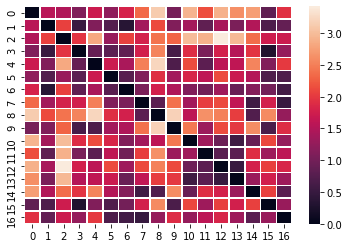

In [ ]:
from scipy.spatial import distance_matrix
import seaborn as sns
import matplotlib.pylab as plt

dists = distance_matrix(X, X)

ax = sns.heatmap(dists, linewidth=0.5)
plt.show()

In [ ]:
print(dists)

[[0.    1.552 1.487 1.118 1.72  1.237 1.811 2.341 3.138 1.03  2.927 2.163
  2.907 2.625 2.746 0.854 1.942]
 [1.552 0.    2.059 0.51  1.118 0.762 0.361 1.389 2.126 1.118 1.4   0.854
  1.421 1.077 1.5   0.707 0.894]
 [1.487 2.059 0.    1.965 2.844 1.304 2.062 1.803 2.408 2.3   3.    2.907
  3.421 2.973 2.377 1.726 1.72 ]
 [1.118 0.51  1.965 0.    0.9   0.825 0.854 1.769 2.55  0.64  1.903 1.063
  1.789 1.53  1.972 0.283 1.273]
 [1.72  1.118 2.844 0.9   0.    1.712 1.442 2.506 3.22  0.707 2.147 0.825
  1.603 1.616 2.55  1.118 2.012]
 [1.237 0.762 1.304 0.825 1.712 0.    0.781 1.118 1.924 1.389 1.838 1.616
  2.126 1.703 1.513 0.721 0.707]
 [1.811 0.361 2.062 0.854 1.442 0.781 0.    1.077 1.78  1.476 1.118 1.
  1.36  0.922 1.14  1.005 0.608]
 [2.341 1.389 1.803 1.769 2.506 1.118 1.077 0.    0.806 2.404 1.389 2.04
  2.138 1.628 0.583 1.78  0.5  ]
 [3.138 2.126 2.408 2.55  3.22  1.924 1.78  0.806 0.    3.189 1.6   2.64
  2.518 2.04  0.728 2.581 1.281]
 [1.03  1.118 2.3   0.64  0.707 1.389 1.47

In [ ]:
print(X[3,:])
print(X[15,:])
print(np.sqrt(np.square(X[3,0]-X[15,0]) + np.square(X[3,1]-X[15,1])))

[-0.6  0.4]
[-0.4  0.6]
0.28284271247461895


# Logistic Regression

The predictive model that the logistic regression algorithm learns corresponds to a vector of coefficients $\Theta \in \Re^{n + 1}$, that is:

$$
\Theta =  [\theta_0, \theta_1, \theta_2, \cdots, \theta_n]
$$

Consider a binary classification task (i.e., the target can only assume two values, 0 or 1). A logistic regression model for this task would predict the most likely class for an instance $\mathbf{x} = [x_0, x_1, x_2, \cdots, x_n]$ by doing the following:

1. Compute $z = \Theta^T \cdot \mathbf{x}$, i.e., $z \in \Re$ is the dot product between the vectors $\Theta$ and $\mathbf{x}$. Notice that $z$ is just a weighted sum: $\theta_0 + \theta_1 \times x_1 + \theta_2 \times x_2 + \cdots  + \theta_n \times x_n$.
2. Compute $\sigma(z)$, the logistic function.
3. If $\sigma(z) < 0.5$, then predict class($\mathbf{x}$) = 0; otherwise predict class($\mathbf{x}$) = 1.

## Probabilistic classifiers
Logistic regression builds a probabilistic classifier, i.e., it is a classification algorithm that produces probabilistic models. This means that this algorithm produces a distribution of probabilities on the possible values ​​of the target feature. In the case of binary classification, the result of the function $\sigma(\Theta^T \cdot \mathbf{x})$ is interpreted as the probability that the example $\mathbf{x}$ belongs to the positive class, which, by convention, corresponds to 1.

$\sigma$ is known as the *sigmoid function* (aka *logistic function*). Its mathematical expression is as follows:

$$
\sigma(z) = \frac{1}{e^{-z} + 1}
$$

The code cell below shows a part of the graph of the logistic function.


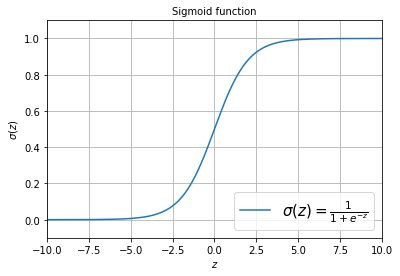

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

sigmoid = lambda x: 1/(1+np.exp(-x))

def plot_sigmoid():
  plt.grid()
  plt.xlim([-10.0, 10.0])
  plt.ylim([-0.1, 1.1])
  xs = np.arange(-10, 10, 0.001)
  plt.xlabel('$z$', size=10)
  plt.ylabel('$\sigma(z)$', size=10)
  plt.title('Sigmoid function', size=10)
  plt.plot(xs, sigmoid(xs), label=r'$\sigma(z)= \frac{1}{1+e^{-z}}$')
  plt.legend(loc='lower right', fontsize=15)

plot_sigmoid()

Notice that

- the range of values ​​that $\sigma(z)$ produces is the open range $ (0,1) $;
- $\sigma(0.0)$ is equal to 0.5;
- for ever-increasing $z$ values ​​(in magnitude), $\sigma(z)$ returns values ​​ever closer to $0$ or $1$.
- $\sigma(z) \geq 0.5$ when $z \geq 0$
- $\sigma(z) < 0.5$ when $z < 0$

In [ ]:
print('sigma(0.0) = %.3f' % sigmoid(0.0))
print('sigma(0.5) = %.3f' % sigmoid(0.5))
print('sigma(-0.5) = %.3f' % sigmoid(-0.5))
print('sigma(10.0) = %.3f' %  sigmoid(10.0))
print('sigma(-10.0) = %.3f' % sigmoid(-10.0))

sigma(0.0) = 0.500
sigma(0.5) = 0.622
sigma(-0.5) = 0.378
sigma(10.0) = 1.000
sigma(-10.0) = 0.000


To give you a more concrete view of what a logistic regression model does, consider a binary classification problem over a training set with 2 predictors, $x_1$ and $x_2$. Also, consider that the logistic regression algorithm produced a model represented by the vector $\Theta = [-3, 1, 1]^T$. The code cell below is a toy implementation of a logistic regression classifier.

In [ ]:
import numpy as np

def sigmoid(x):
    # Sigmoid function
    return 1 / (1 + np.exp(-x))

def dot_product(theta, x):
    # Compute the weighted sum.
    return np.dot(x, theta)

def predict(theta, x):
  y_prob = proba(theta,x)
  return np.round(y_prob).astype(np.int)

def proba(theta, x):
    # Returns the probability that x belongs to the positive class
    return sigmoid(dot_product(theta, x))

Further, consider that we want to determine (predict) the class for the examples $[3,3]$ and $[0.4,1.3]$. The following code produces the probability value that $\mathbf{x}$ belongs to the positive class.

In [ ]:
theta = np.asarray([-3, -1, -1]).T

X = np.asarray([[3, 3],[0.4, 1.3]])

print('Example(s):\n', X)

col = np.ones((2,1))
X = np.append(col, X, axis=1)

print('Predicted class(es) for each example:', predict(theta, X))
print('Probability of each example belonging to the positive class:', proba(theta, X))

Example(s):
 [[3.  3. ]
 [0.4 1.3]]
Predicted class(es) for each example: [0 0]
Probability of each example belonging to the positive class: [0.00012339 0.0090133 ]


In the example above:

1. How do you interpret the output when $\Theta = [-3, 1, 1]^T$? 
2. What happens if you change $\Theta$ to $[-3, -1, -1]^T$?
3. What happens if you keep $\Theta = [-3, 1, 1]^T$ and try to classify the example $\mathbf{x}=[0.4,1.3]$?

## Decision boundaries

We can have a graphical intuition of the example above. Again, suppose $\Theta = [-3, 1, 1]^T$. Then to classify an example $\mathbf{x} = (x_1, x_2)$:

$$
\Theta^T \cdot \mathbf{x} = [-3, 1, 1]^T \cdot [1,x_1,x_2] = -3 + x_1 + x_2
$$

Recall that, if $(\Theta^T \cdot \mathbf{x}) \geq 0$, then $\mathbf{x}$ is classified as positive. That is:

$$
-3 + x_1 + x_2 \geq 0 \rightarrow x_1 + x_2 \geq 3
$$

The equation $x_1 + x_2 = 3$ actually defines what we call a *decision boundary*. According to the Wikipedia, the definition of a decision boundary is the following:

> In a classification problem with two classes, a decision boundary or decision surface is a hypersurface that partitions the underlying vector space into two sets, one for each class. The classifier will classify all the points on one side of the decision boundary as belonging to one class and all those on the other side as belonging to the other class.

In the case of a 2-dimensional dataset, as the space of predictors is bidimentional, the decision boundary is a simple line in the cartesian plane. This line splits the space of features in two subregions, positive and negative. See the plot below.

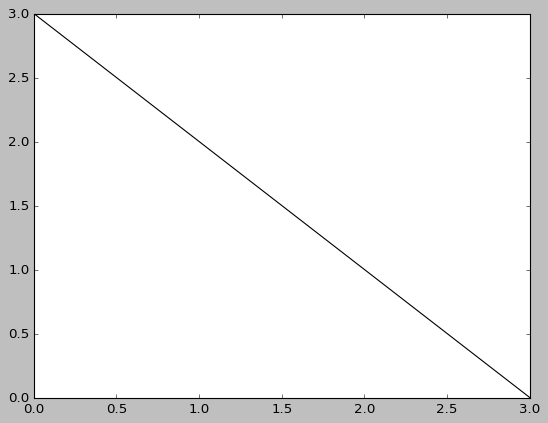

In [ ]:
from matplotlib import pyplot as plt

point1 = [0, 3]
point2 = [3, 0]

x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]

plt.plot(x_values, y_values, c='black')
plt.show()

In particular, all the examples that fall above this line are classified as being positive, while the examples predicted as negative are located below this line.

[0 1]


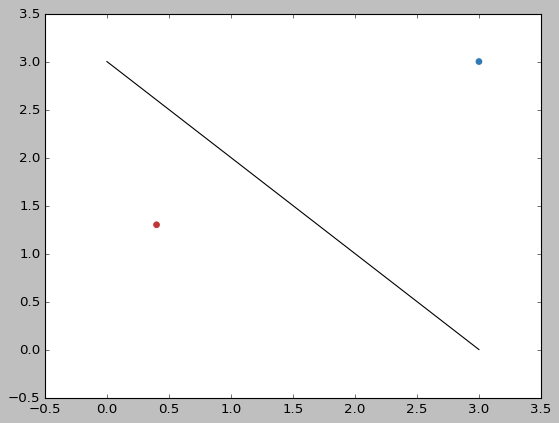

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

data = np.array([
    [0.4, 1.3],
    [3, 3]
])

col = np.ones((2,1))
x = np.append(col, data, axis=1)

y_pred = predict(theta, x)
print(y_pred)

ax = plt.gca()
ax.scatter(data[:,0], data[:, 1], c=np.array([0,1]), s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

plt.plot(x_values, y_values, c='black')
plt.show()

Let us draw the decision boundary defined by the vector $\Theta = [-3, 1, 1]^T$ along with the examples in the toy dataset presented above.

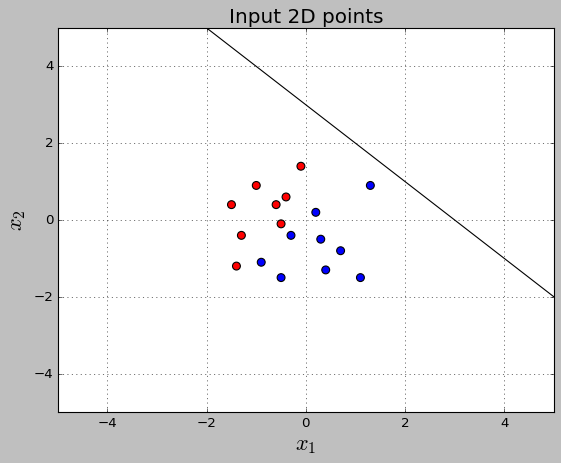

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')
np.set_printoptions(precision=3, suppress=True)

colormap = np.array(['r', 'b'])

def plot_scatter(X, y, colormap):
  plt.grid()
  plt.xlim([-5.0, 5.0])
  plt.ylim([-5.0, 5.0])
  plt.xlabel('$x_1$', size=20)
  plt.ylabel('$x_2$', size=20)
  plt.title('Input 2D points', size=18)
  plt.scatter(X[:,0], X[:, 1], s=50, c=colormap[y])

plot_scatter(X, y, colormap)

point1 = [-5, 8]
point2 = [5, -2]

x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]

plt.plot(x_values, y_values, c='black')


By analysing the image above, it should be clear that the decision boundary defined by the vector $\Theta = [-3, 1, 1]^T$ is **not** the best one, in the sense that it does not correctly classify many of the examples in the training dataset. In particular, the *prediction error* of the corresponding classifier is $8/17 \approx 47\%$, which is worst than tossing a coin to determine the class of an new example!

## Optimization problems

You now should understand that the goal in logistic regression is to find the components of the vector $\Theta$, taking as input the training set $X$. You should also understand that, from the infinitely many vectors $\Theta$, we want to find the one that minimizes the prediction error of the corresponding model.

To determine the most appropriate parameter vector $\Theta$, logistic regression must solve an optimization problem. An optimization problem is one in which, given a function, we want to find the point that corresponds to the optimal value (minimum or maximum) of the function.

As an illustration, the following code computes the minimum value of the function $f(x) = x^3 - 3x^2 + 7$ within the range $[3,500]$.

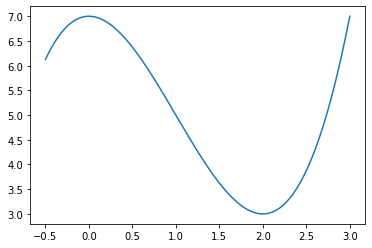

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

f1 = lambda x: (x ** 3)-(3 *(x ** 2))+7

# Get 1000 evenly spaced num bers between -1 and 3 (arbitratil chosen to ensure steep curve)
x = np.linspace(-0.5,3,500)

# Plot the curve
plt.plot(x, f1(x))
plt.show()

In [ ]:
from scipy import optimize

result = optimize.minimize_scalar(f1)
print(result.success) # check if solver was successful

print('Minimum of function occurs at x = %.2f' % result.x)

True
Minimum of function occurs at x = 2.00


The concept of optimization is also applicable to functions of more than one variable.

In the following example, a function of two variables (a paraboloid in this case) is used to illustrate the optimization procedure.

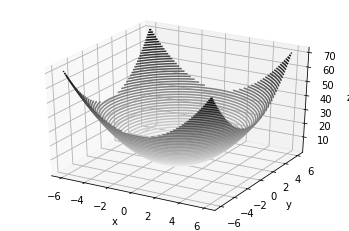

In [ ]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np

def f_paraboloide(x, y):
    return x ** 2 + y ** 2

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f_paraboloide(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

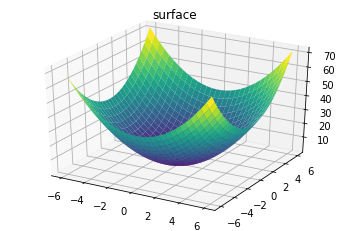

In [ ]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

In [ ]:
from scipy import optimize

def f2(x):
    return (x[0]**2 + x[1]**2)

optimize.minimize(f2, [2, -1], method="CG")

     fun: 5.8281095370852615e-15
     jac: array([-1.2166366e-07,  8.3183572e-08])
 message: 'Optimization terminated successfully.'
    nfev: 12
     nit: 1
    njev: 3
  status: 0
 success: True
       x: array([-6.82824108e-08,  3.41412054e-08])

In general, optimization problems are difficult, because the function in question can be complex, as shown below.

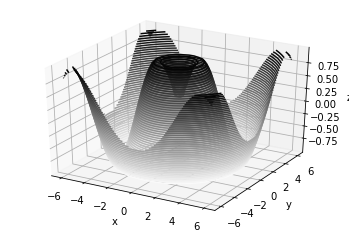

In [ ]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np

def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

Logistic regression has to solve an optimization problem to find the best vector of parameters given the training dataset. In particular, the type of optimization problem to be solved in the logistic regression is minimization: given a function $J(\Theta)$ that measures the error of the classification model on the training data, the objective is to find the combination of components of $\Theta$ such that it produces the minimum value for $J(\Theta)$.

Consider a binary classification problem where there are $m$ examples in the training set. Also consider that $y^{(i)} \in \{0.1\}$ is the class associated with the $i$-th training example, and that $g(z)$ is the value of the $g function$ corresponding to the $i$-th training example, $z_i = \Theta^T \cdot \mathbf{x}^{(i)}$. The function that logistic regression must minimize is called cross entropy loss or logistic loss, and its definition is as follows:

$$
J(\Theta) = -\frac{1}{m} \sum_{i = 1}^{m} [ y^{(i)} \log (\sigma(z_i)) + (1-y^{(i)}) \log (1 - \sigma(z_i))]
$$
To get an insight into the cost function above, let's just consider the cost corresponding to the $ i $ -th training example (for any $i$ any):

$$
y^{(i)} \log(\sigma(z_i)) + (1-y^{(i)}) \log(1 - \sigma(z_i))
$$

In the above expression, note that the cost is zero when the prediction and hypothesis are the same:

- $(\sigma(z_i) \rightarrow 0)$ and $(y^{(i)} = 0)$ $\Rightarrow$ (cost $\rightarrow$ 0)
- $(\sigma(z_i) \rightarrow  1)$ and $(y^{(i)} = 1)$ $\Rightarrow$ (cost $\rightarrow$ 0)

However, if prediction and hypothesis are different, we have one of the following two cases:

- $(\sigma(z_i) \rightarrow 0)$ and $(y^{(i)} = 1)$ $\Rightarrow$ $($cost $\rightarrow \infty)$ 
- $(\sigma(z_i) \rightarrow 1)$ and $(y^{(i)} = 0)$ $\Rightarrow$ $($cost $\rightarrow \infty)$

The above analysis considers only the extreme values ​​that $\sigma(z_i)$ can take. In any case, the general conclusion we should draw is that the minimization algorithm is penalized when it selects a $\Theta$ vector that produces the wrong prediction for the $i$-th example.

The above explanation was given in the context of a single example. What the function $J(\Theta)$ does is to compute the *average error* over all $m$ training examples.

### Gradient Descent (and its variants)

One of the most used methods to perform numerically the minimization that the logistic regression needs is the descending gradient method. Using this method, the process of minimizing the cost function occurs in an iterative way. At each iteration, a small change is made to the components of the $\Theta$ parameter array:

Repeat until convergence: 
$$
\theta_j := \theta_j - \alpha \sum_{i = 1}^{m}(\sigma(\Theta^T \cdot \mathbf{x}^{(i)}) - y^{(i)}) \, x_j^{(i)}
$$

In the update expression presented above, $\alpha$ is a numerical value called the *learning rate* of the optimization algorithm. This constant controls the amount of update on the components of the $\Theta$ array.

There are numerous gradient-based optimization methods. The study of these methods is outside the scope of this course. In any case, the following animations illustrate the behavior of some of these methods while minimizing a given function.

([source]((https://www.datasciencecentral.com/profiles/blogs/an-overview-of-gradient-descent-optimization-algorithms)))
![alt text](http://storage.ning.com/topology/rest/1.0/file/get/2808318953?profile=original)

([source]((https://www.datasciencecentral.com/profiles/blogs/an-overview-of-gradient-descent-optimization-algorithms)))
![alt text](http://storage.ning.com/topology/rest/1.0/file/get/2808327843?profile=original)

The learning rate is a hyperparameter of logistic regression. The following animation illustrates the effect of different learning rate values ​​on the optimization process. When $\alpha$ is defined as too large and the evaluation sequence starts to get out of control, the sequence of steps is said to diverge. On the other hand, if the value of $\alpha$ is very small, the convergence of the process can take significantly.

![alt text](https://github.com/jermwatt/machine_learning_refined/blob/gh-pages/html/gifs/steplength_1D.gif?raw=true)

Source: [Machine Learning Refined](https://github.com/jermwatt/machine_learning_refined)


## Logistic Regression in Scikit-Learn

The cells below * illustrate the use of the [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) class.

One of the parameters for instantiating the `LogisticRegression` class is called *solver*. This argument defines the optimization method to be used during training.

*example adapted from the book [Hands-on Machine Learning with Scikit-Learn and Tensoflow](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1491962291).

In [ ]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

In [ ]:
X

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.1],
       [0.1],
       [0.2],
       [0.4],
       [0.4],
       [0.3],
       [0.3],
       [0.3],
       [0.2],
       [0.4],
       [0.2],
       [0.5],
       [0.2],
       [0.2],
       [0.4],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.1],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.3],
       [0.3],
       [0.2],
       [0.6],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [1.4],
       [1.5],
       [1.5],
       [1.3],
       [1.5],
       [1.3],
       [1.6],
       [1. ],
       [1.3],
       [1.4],
       [1. ],
       [1.5],
       [1. ],
       [1.4],
       [1.3],
       [1.4],
       [1.5],
       [1. ],
       [1.5],
       [1.1],
       [1.8],
      

The next code cell fits a logistic regression model to the training set.

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Once the model has been generated, it is possible to invoke the predict method, as shown in the following example.

In [ ]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

The following cell produces a graph that makes it easier to interpret the generated model. In this graph, the point where the solid and dashed curves meet corresponds to the decision boundary of the generated logistic regression model.

What is the decision boundary in this example?

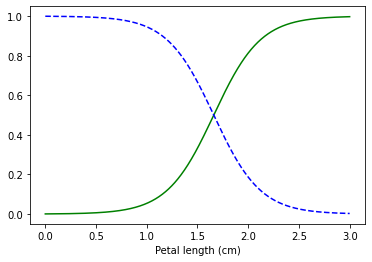

In [ ]:
import matplotlib.pyplot as plt

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")

plt.xlabel('Petal length (cm)')
plt.show()

The vector of coefficients of the generated logistic regression model is stored in two different attributes of the LogisticRegression class: `coef_` and `intercept_`. See the code cell below.

In [ ]:
print(log_reg.coef_)
print(log_reg.intercept_)

[[4.3330846]]
[-7.1947083]


$$
\Theta = [4.3, -7.19]
$$

By inspecting the above output, we can conclude that the decision boundary is:

$$
\theta_0 + \theta_1 \times x_1 = 0
$$

If we replace the values in the above equation, we get:

$$
4.33 - 7.19 \times x_1 = 0
$$

By a simple manipulation of the above expression, we can find that the decision boundary here is a vertical line that crosses $x_1 \approx 1.66$, which is consistent with the plot shown above.

In this example, notice that $x_1$ represents the only predictor used to generate the model, *petal length*.


In [ ]:
7.19/4.33

1.6605080831408776

## Case study: Toy dataset

Let us go back to our toy dataset and make build a decent classifier using Scikit-Learn. 

In [ ]:
import numpy as np

X = np.array([[-0.1, 1.4],
              [-0.5,-0.1],
              [ 1.3, 0.9],
              [-0.6, 0.4],
              [-1.5, 0.4],
              [ 0.2, 0.2],
              [-0.3,-0.4],
              [ 0.7,-0.8],
              [ 1.1,-1.5],
              [-1.0, 0.9],
              [-0.5,-1.5],
              [-1.3,-0.4],
              [-1.4,-1.2],
              [-0.9,-1.1],
              [ 0.4,-1.3],
              [-0.4, 0.6],
              [ 0.3,-0.5]])

y = np.array([0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1])

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(log_reg.coef_)
print(log_reg.intercept_)

[[ 1.52160613 -1.11119985]]
[0.38532946]


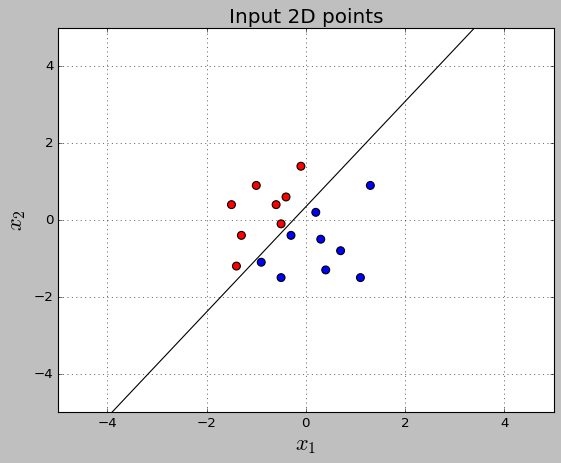

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')
np.set_printoptions(precision=3, suppress=True)

colormap = np.array(['r', 'b'])

def plot_scatter(X, y, colormap):
  plt.grid()
  plt.xlim([-5.0, 5.0])
  plt.ylim([-5.0, 5.0])
  plt.xlabel('$x_1$', size=20)
  plt.ylabel('$x_2$', size=20)
  plt.title('Input 2D points', size=18)
  plt.scatter(X[:,0], X[:, 1], s=50, c=colormap[y])

plot_scatter(X, y, colormap)

points_x = [x/10. for x in range(-50,+50)]

bias = log_reg.intercept_
w = log_reg.coef_.T
points_y = [-(w[0] * x + bias)/(w[1]) for x in points_x]
plt.plot(points_x, points_y, color = 'black')

## Case study: honor dataset

Let us see a complete example of creating a logistic regression model with Scikit-Learn on the honor dataset. This is a dataset that contains 200 observations about students. The feature we will use a target is `hon` which indicates if a student is an honor class or not.

In [ ]:
import pandas as pd
df_honor_data = pd.read_csv('https://raw.githubusercontent.com/OmaymaS/Logistic-Regression-Coefficients-Interpretation/master/honordata.csv')
df_honor_data.head()

,female,read,write,math,hon,femalexmath
0,0,57,52,41,0,0
1,1,68,59,53,0,53
2,0,44,33,54,0,0
3,0,63,44,47,0,0
4,0,47,52,57,0,0


In [ ]:
X = df_honor_data.drop(columns=['hon'])
y = df_honor_data.hon

In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
195    0
196    0
197    0
198    1
199    1
Name: hon, Length: 200, dtype: int64

In [ ]:
print(X.shape)
print(y.shape)

(200, 5)
(200,)


In classification, it is very common to split the available observations in two datasets: training and test. In Scikit-Learn, we can do this by using the `train_test_split` function.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(200, 5)
(160, 5)
(40, 5)


The following image illustrates the effect of applying the function `train_test_split` on the data matrix $X$ and response vector $y$. From these, two data matrices and two response vectors are created. 

![alt text](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1543836883/image_6_cfpjpr.png)

Please notice that, each time `train_test_split` is called, it randomly selects which examples to put in the training and test datasets.

In [ ]:
y_pred = log_reg.predict(X_test)

In [ ]:
print(y_pred)

[1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0
 0 0 1]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

In [ ]:
print(y_test.values)

[1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0
 0 0 1]


In [ ]:
print(log_reg.coef_)
print(log_reg.intercept_)

[[-1.05519995e-02 -1.67596700e-03  2.32999559e+00 -3.62224213e-02
  -1.02388613e-02]]
[-138.314996]


# $k$-Nearest Neighbors

The $k$ nearest neighbors ($k$-NN) algorithm is one of the simplest Data Mining methods. Despite being simple, it often produces satisfactory results. It can be used for both classification and regression problems.

$k$-NN is a *lazy learning* algorithm. This means the training phase consists only of storing the representations of the examples. That is, the algorithm does not explicitly produce a classification model.

## Definition of neighbors

To classify an example $\mathbf{x}$, $k$-NN produces a total order on the $\mathbf{x}$ “neighbors”, taken from the training set $X$.

The meaning of neighbor here is in the context of *similarity*. The classes of the $k$ most similar neighbors are used to predict the class of $\mathbf{x}$.

The following figure ([source](https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn)) illustrates the behavior of $k$-NN for $k = 1$ in the context of binary classification. Notice that there is only one example inside the ball of neighbors for $\mathbf{x}$. Hence $1$-NN would predict that $\mathbf{x}$ belongs to the *red* class.

![alt text](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/Knn_k1_z96jba.png)

In the case where $k$ is chosen to greater than 1, then the [majority rule](https://en.wikipedia.org/wiki/Majority_rule) is applied to predict the class of $\mathbf{x}$. See the image below for the case $k=3$.

![alt text](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final1_ibdm8a.png)

Usually, some distance measure is used to compute the similarity between examples. Some popular measures are listed below.

Measures for continuous features:
* Manhattan distance 
* Euclidean distance
* Cosine similarity

Measures for discrete features:
* Hamming distance
* Value distance measure

Pr(pos) = 2/3
Pr(neg) = 1/3

![alt text](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final1_ibdm8a.png)


The animation below illustrates the behavior of $k$-NN in a toy dataset with two predictive features and two classes.

In [ ]:
from IPython.display import HTML

HTML("""
<video width="640" height="480" controls>
  <source src="https://assets.yihui.name/figures/animation/example/knn-ani/demo-a.mp4?dl=1" type="video/mp4">
</video>
""")

## Steps of the Algorithm

* Compute the $k$ neighborhood for an example $\mathbf{x}$. i.e., determine the $k$ “nearest” neighboring examples of $\mathbf{x}$.

* Count the amount $q(c_i)$ of examples in the $k$-neighborhood that belong to the class $c_i$.

* Produce an estimate of $\Pr(c_i \mid \mathbf{x})$:

* Classify $\mathbf{x}$ as belonging to the most likely class (called the *majority class*).

No optimal number of neighbors suits all kind of datasets. The value of $k$ for a particular dataset can be determined using *model selection*, which is a concept we will cover later on in this course.

## $k$-NN in Scikit-Learn

Scikit-Learn's [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class implements the $k$-NN algorithm. In its simplest form of instantiation, it is only necessary to configure the hyperparameter $k$, which corresponds to the number of neighbors.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn import datasets
iris = datasets.load_iris()

X = iris.data    # data matrix
y = iris.target  # response vector

train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y)

modelKNN = KNeighborsClassifier(n_neighbors=3) # k = 3

modelKNN.fit(train_X, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
# predict the class for example x = [1.1, 1.2, 3, 2] 
x = [1.1, 1.2, 3, 2]
print(modelKNN.predict([x]))

[1]


Notice that we can predict the classes for a bunch of examples.

In [ ]:
y_pred_prob_KNN = modelKNN.predict(test_X)

# Imprime as estimativas de probabilidades para cada classe
print(y_pred_prob_KNN)

[2 0 1 0 0 0 2 2 2 1 0 1 2 1 2 0 2 1 1 2 1 1 0 0 2 1 0 0 1 1]


Contrary to what one might think, 
$k$-NN can produce very complex decision boundaries. The following images illustrate this behavior of the algorithm.

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/2/20/Coloured_Voronoi_2D.svg/220px-Coloured_Voronoi_2D.svg.png)

[source](https://pt.wikipedia.org/wiki/Diagrama_de_Voronoy)

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Voronoi_growth_euclidean.gif/220px-Voronoi_growth_euclidean.gif)

[source](https://en.wikipedia.org/wiki/Voronoi_diagram)

Voronoi cell

# Decision Trees

A decision tree is a predictive model that takes an example $\mathbf{x}$ as described by a set of predictive features and their respective values, and returns a predicted value for the target feature.

The following example ([source](https://en.wikipedia.org/wiki/Decision_tree_learning)) presents a decision tree that models the possibility of passengers surviving on the [Titanic disaster](https://www.kaggle.com/c/titanic). The feature "sipsb" corresponds to the number of spouses or brothers on board. The other predictive features are self-explanatory. The numbers under the leafs show the probability of survival and the percentage of examples on the corresponding leaf.

![alt text](https://upload.wikimedia.org/wikipedia/commons/f/f3/CART_tree_titanic_survivors.png)

A decision tree has several *nodes*, both internal and external. The latter type is also called a leaf. Each internal node is associated to a predicate involving one of the predictive features. Each leaf is associated to a single value of the target feature. In the tree given as example above, there are three internal nodes (for features `sex`, `age` and `sibsp`) and four external nodes. 

A decision tree is a classification model that determines the class for an new example by executing a test sequence.

* Each internal node in the tree corresponds to a test on the value of one of the attributes.

* Branches from each internal node are identified (labeled) with the possible values ​​of the test.

* Each leaf node specifies the value to be returned if that leaf is reached.

Decision trees are known for their ease of interpretation. In the example above, we can interpret that the chances of survival were greater for (i) a woman or (ii) a man under 9.5 years old and less than 2.5 siblings (or spouses).

## Steps of the algorithm

The goal of a *decision tree learning algorithm* is to build a decision tree. The basic decision tree learning algorithm consists of the following steps:

1. Start at the root node as the parent node
2. Split the parent node using the $x_i$ attribute that minimize the sum of impurities in the child node (or maximize the *information gain*)
3. Assign training samples to new child nodes
4. Stop if the resulting nodes are pure or if any stopping criteria are met; repeat steps 1 and 2 for each new child node

The following animation ([source](https://annalyzin.wordpress.com/2016/07/27/decision-trees-tutorial/)) illustrates the recursive procedure performed by the decision tree learning algorithm. Here, consider a dataset with fourteen examples, 6 positive and nine negative. Also consider that each example has two features (represented in the animation as X and Y) with range of values betweent 0 and 1. The animation shows that the building process starts with a tree with just one node (its root node) which is associated to the feature X. Notice that the predicate $X>0.5$ splits the original examples in two disjoint sets. Also notice that the examples associated to the the value Yes for the predicate are all negative. These examples are associated to a leaf node. On the other hand, the second set has 6 positive and 3 negative examples. As exists impurity in this set, the corresponding node has to be split. This process of node spliting continues until some *stopping criteria* is met. At the end of this process, a decision tree is built.

![alt text](https://annalyzin.files.wordpress.com/2016/07/decision-tree-tutorial-animated3.gif?w=620)


There are several possible stopping criteria:
* Leaf nodes are pure
* Maximum node depth is reached
* Dividing a node does not lead to an *information gain*.

From the above example, it should be clear that there should exist a way for the decision tree algorithm to select the best attribute when a node split is necessary. We call this the *feature selection criteria*.

![alt text](https://miro.medium.com/max/661/0*DX1px-z340TgpXTN.png)


Pr(Outlook = Rainy) = 5/14
Pr(Outlook = Overcast) = 4/14
Pr(Outlook = Sunny) = 5/14



In [ ]:
import numpy as np

-((5/14) * np.log(5/14) + (4/14) * np.log(4/14) + (5/14) * np.log(5/14))

1.0933747175566468

In [ ]:
-((12/14) * np.log(12/14) + (1/14) * np.log(1/14) + (1/14) * np.log(1/14))

0.509137344082687

## Feature selection criteria

The decision tree learning algorithm is recursive. During the construction of the model (i.e., the decision tree), the choice of features should be made in such a way as to minimize the depth of the decision tree. At each step, the algorithm chooses the feature that goes as far as possible in the exact classification of the examples.

A perfect feature would divide the examples into subsets of the same class (i.e., all positive or all negative). To choose a suitable feature for a new internal node in the tree, the solution is to measure each feature according to the expected amount of information provided by it.

There are two most commonly used criteria for feature selection when learning a decision tree:

* information gain
* gini index

### Information Gain

The information gain is based on a measure from [Information Theory](en.wikipedia.org/wiki/Information_theory) called *entropy*.

Given a probability distribution for a discrete random variable $V$ with $n$ values, if each possible value $v_i$ of $V$ has probability $p_i$, then the entropy $H$ of that distribution is given by:

$$
H = -\sum_{v_i \in V} p_i \log_2 p_i
$$

The following figure illustrates the concept of entropy for a random variable that can assume only two values, with corresponding probabilities equal to $p$ and $q$. Note that entropy is maximum when the two values ​​are equally likely to occur (i.e., $p = q = 0.5$).

![alt text](https://miro.medium.com/max/349/0*kt06lkLbs7-B7SmE.png)

Entropy measures the homogeneity of a dataset with respect to the value of a given attribute. If this attribute has the same value for all examples in the data set, then entropy is minimal. On the other hand, if the values ​​of this attribute occur uniformly, then entropy of the dataset is maximal.

You are encouraged to watch this nice and instructive [video](https://youtu.be/9r7FIXEAGvs) about the concept of entropy.

Information gain is the difference in entropy measured before and after dividing a dataset by the values ​​of one of its predictive attributes.

For example, consider the following toy dataset, where one of the predictive features is `outlook`.

![alt text](https://miro.medium.com/max/661/0*DX1px-z340TgpXTN.png)

If we divide the dataset by the values ​​of the Outlook feature, the result is 3 other datasets, as shown in the following figure.

![alt text](https://miro.medium.com/max/446/0*N01l6jqQtVXvsEyk.png)

We can measure the entropy $H_1$ of the original data set. We can also measure the entropy of each of the 3 sets resulting from the division by the Outlook attribute and compute the resulting weighted average entropy $H_2$. If we make $H_2 - H_1$, we get the value of the information gain for the Outlook attribute.

The selection criterion based on information gain chooses the attribute that produces the highest information gain among the available attributes.

In Scikit-Learn, the mutual_info_classif function can be used to compute the information gain for a set of attributes, as shown in the following example.

In [ ]:
# fonte: https://stackoverflow.com/questions/46752650/information-gain-calculation-with-scikit-learn
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_extraction.text import CountVectorizer

categories = ['talk.religion.misc',
              'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      categories=categories)

X, Y = newsgroups_train.data, newsgroups_train.target
cv = CountVectorizer(max_df=0.95, min_df=2,
                                     max_features=10000,
                                     stop_words='english')
X_vec = cv.fit_transform(X)

res = dict(zip(cv.get_feature_names(),
               mutual_info_classif(X_vec, Y, discrete_features=True)
               ))
print(res)

{'00': 0.0062217548845825985, '000': 0.01130246093292954, '00000': 0.0012412324256375618, '0005': 0.003108141579466518, '0010580b': 0.0018924586447506726, '001428': 0.0015319298587311032, '001718': 0.0018628591633699006, '002': 0.0012609485946591687, '01': 0.005063992737829265, '01wb': 0.003108141579466518, '02': 0.005670962638050225, '0200': 0.0018924586447506718, '02139': 0.0012499951251094144, '024423': 0.0018628591633699006, '03': 0.004760929256778008, '033': 0.0018628591633699006, '034101': 0.0012412324256375635, '0362': 0.0024851616866216134, '04': 0.012026433047572957, '040': 0.0012827028287951915, '0400': 0.003108141579466519, '04110': 0.0018628591633699006, '0423': 0.0012609485946591687, '05': 0.003530904851302254, '051746': 0.0024851616866216134, '06': 0.002860706403377422, '060': 0.0012412324256375635, '0608': 0.0013558269777203544, '0615': 0.0027400885069510696, '0674': 0.0018628591633699006, '07': 0.0025185031666803905, '08': 0.004287291177931728, '0891': 0.001862859163369

## Decision Tree Classifier in Scikit-Learn 

In Scikit-Learn, the class [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) implements a customizable algorithm for learning decision trees. The following code example illustrates the use of this class. The example is given in the context of the Iris data set. Here, the third and fourth attributes represent the petal length and petal width of each flower. The classes have already been converted to integer labels, where 0 = Iris-Setosa, 1 = Iris-Versicolor, 2 = Iris-Virginica.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

# petal length and petal width
X = iris.data[:, [2, 3]]

# response vector
y = iris.target

print('Class labels:', np.unique(y))

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=4, 
                              random_state=1)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

print('Accuracy on test set: %.2f' % accuracy_score(y_test, y_pred))

Class labels: [0 1 2]
Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]
Accuracy on test set: 0.98


We can also visualize the decicions boundary of this model. See below.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


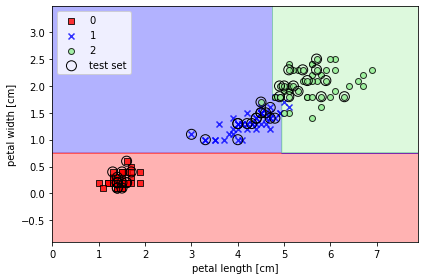

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

For curiosity's sake, notive that tt is possible to export the image above to a file. See below.

In [ ]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree,
                           filled=True, 
                           rounded=True,
                           class_names=['Setosa', 
                                        'Versicolor',
                                        'Virginica'],
                           feature_names=['petal length', 
                                          'petal width'],
                           out_file=None) 
graph = graph_from_dot_data(dot_data) 
graph.write_png('tree.png')

## Advantages

Some advantages of decision trees are:

* Simple to understand and interpret. Trees can be viewed.
* Requires little data preparation. Other techniques usually require data normalization, dummy variables need to be created and blank values ​​to be removed. However, note that this module does not support missing values.
* The cost of using the tree (ie, predicting data) is logarithmic in the number of data points used to train the tree.
* Able to handle numerical and categorical data. Other techniques are generally specialized in the analysis of data sets that have only one type of variable. See algorithms for more information.

# Naive Bayes Classifier

The Naive Bayes Classifier (like a logistic regression model) is a  probabilistic classification model. The model generated by the Naive Bayes algorithm is a set of *conditional probabilities*. See a nice explanation about conditional probabilities [here](https://setosa.io/conditional/).

0 --> 0.95

1 --> 0.05

## Estimating probabilities from data

Let us see an example of how probability estimates can be computed in a dataset. For this, consider the [Play Tenis dataset](https://www.kaggle.com/fredericobreno/play-tennis), which is another toy dataset with four predictors (`outlook`, `temp`, `humidity`, and `wind`) and fourteen examples. The target (`play`) is binary. Each example provides data about the weather condition in a particular day. Therefore, the classification task if to predict whether a given day is appropriate to play tenis or not.

In [ ]:
import pandas as pd
df_play_tennis = pd.read_csv('play_tennis.csv')
df_play_tennis

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


As an exercise, compute estimates for the following probatilities (likelihoods):

- $\Pr(\operatorname{outlook} = \text{Sunny} \mid \operatorname{play} = \text{Yes}) \approx \text{_____}$
- $\Pr(\operatorname{outlook} = \text{Sunny} \mid \operatorname{play} = \text{No}) \approx \text{_____}$

- $\Pr(\operatorname{temp} = \text{Hot} \mid \operatorname{play} = \text{Yes}) \approx \text{_____}$
- $\Pr(\operatorname{temp} = \text{Hot} \mid \operatorname{play} = \text{No}) \approx \text{_____}$

- $\Pr(\operatorname{humidity} = \text{High} \mid \operatorname{play} = \text{Yes}) \approx \text{_____}$
- $\Pr(\operatorname{humidity} = \text{High} \mid \operatorname{play} = \text{No}) \approx \text{_____}$

- $\Pr(\operatorname{wind} = \text{Weak} \mid \operatorname{play} = \text{Yes}) \approx \text{_____}$
- $\Pr(\operatorname{wind} = \text{Weak} \mid \operatorname{play} = \text{No}) \approx \text{_____}$

In [ ]:
5/14

0.35714285714285715

prior probability

Let us see some examples of probability estimates that can be computed from the above dataset. First, let us compute the estimates for the prior probabilites.

$$
\Pr(\operatorname{play} = \text{'Yes'}) \approx \frac{5}{14} \approx 36\%
$$

$$
\Pr(\operatorname{play} = \text{'No'}) \approx \frac{9}{14} \approx 64\%
$$

The way to interpret these prior probabilities is the following: if you do not know anything about the weather conditions in a given day, then there is approximately 64% chance that this day is appropriate to play tenis.

We can also compute an estimate for the conditional probability $\Pr(\operatorname{outlook} = \text{Sunny}  \mid \operatorname{play} = \text{'No'})$:

$$
\Pr(\operatorname{outlook} = \text{Sunny}  \mid \operatorname{play} = \text{No}) \approx \frac{3}{5}.
$$

It is also easy to compute estimate for probabilities like $\Pr(\operatorname{outlook} = \text{Sunny} \text{ and } \operatorname{temp} = \text{Hot} \mid \operatorname{play} = \text{No})$:

$$
\Pr(\operatorname{outlook} = \text{Sunny} \text{ and } \operatorname{temp} = \text{Hot} \mid \operatorname{play} = \text{No}) \approx \frac{2}{5} = 40\%
$$

As a final example of computing probability estimates, let us consider $\Pr(\operatorname{play} = \text{No}  \mid \operatorname{outlook} = \text{Sunny})$:

$$
\Pr(\operatorname{play} = \text{No}  \mid \operatorname{outlook} = \text{Sunny}) \approx \frac{3}{5} = 60\%
$$

## Bayes' theorem

The term "bayesian" comes from Thomas Bayes, the name of a British Presbyterian minister who lived in the 18th century and who formulated the famous [Bayes' theorem](https://en.wikipedia.org/wiki/Bayes%27_theorem).

$$
\Pr(y \mid x_1, x_2, \dots, x_n) = \frac{\Pr (y) \Pr (x_1, x_2, \dots x_n \mid y)} {\Pr(x_1, x_2, \dots, x_n)}
$$

The following is a description of each term in the above expression.

* $\Pr(y \mid x_1, \dots, x_n)$ represents the probability of the class $y$, given the values ​​of the attributes of the example $\mathbf{x}$. This term, called **posterior probability**, is what must be determined (learned) by the algorithm.

* $\Pr(x_1, \dots x_n \mid y)$ represents the probability that a specific combination of values ​​$x_1, \dots, x_n$ will occur in examples associated with a specific value of the target attribute $y$. This term is called **likelihood**.

* $\Pr(y)$ represents the probability that an example selected at random belongs to a given class (i.e., belongs to a given value of the target attribute $y$). This term is called **prior probability**

* $\Pr (x_1, x_2, \dots, x_n) $ represents the probability that a given combination of values ​​$ x_1, x_2, \dots, x_n$ will occur in an example selected at random.

These probabilities are actually estimated from the training dataset by the Naive Bayes algorithm. These estimates are computed by counting the occurrences of values in a given feature, either separately  or in conjunction with values of other features.

## Independence and conditional independence

Recall the estimate $\Pr(\operatorname{play} = \text{No}  \mid \operatorname{outlook} = \text{Sunny}) \approx 60\%$. This estimate tells us that, if you are in a sunny day, then the chance is $60$% that this is not a good day to play tennis. Now, compare this value with the estimate for $\Pr(\operatorname{play} = \text{'No'}) \approx 36\%$. We can conclude that, knowing that we are in a sunny day changes our bets that this day is appropriate to play tenis. In other words, it seems to exist a **dependence** between variables `play` and `outlook`. 

In general, two variables (events) $A$ and $B$ are said to be independent if and only if both identities below are true:

1. $\Pr(A \mid B) = \Pr(A)$

2. $\Pr(B \mid A) = \Pr(B)$

Another related concept is *conditional independence*. Given three variables A, B, and C. We say that variables A and B are conditionally independet given the variable C if and only if knowing the value of C makes A and B independent of each other.

## Steps of algorithm

Naive Bayes is an algorithm consisting of two steps, which are described below. Formally, let $X$ be a dataset. Also consider that $c_1, c_2, \ldots, c_k$ are the classes of the problem (i.e., the possible values ​​of the target feature) and that $\mathbf{x} = [x_1, x_2, ..., x_n]$ is a new example that should be classified. Let $a_1, a_2, ..., a_n$ be the values for the predictive features $x_1, x_2, ..., x_n$, respectively.

### Steps:

1. Calculate the posterior probabilities $\Pr(y = c_j \mid \mathbf{x})$, $j = 1,2, \ldots, k $
2. Classify $\mathbf{x}$ as being of class $c$ such that $\Pr(y = c \mid \mathbf{x})$ is maximum.


The term *naive* stems from the fact that Naive Bayes considers as a hypothesis that, given a value of the target $y$, the predictive features are statistically independent from each other. When considering this hypothesis, the computation of the conditional probabilities can be simplified like this:

$$
\Pr(x_1, x_2, \dots x_n \mid y) = \Pr(x_1 \mid y) \times \Pr(x_2 \mid y) \times \ldots \times \Pr(x_n \mid y)
$$

In many practical cases, this statistical independence between predictors considered does not exist. For example, consider a dataset with information about customers of a company. Also consider that each customer is represented by the following features: *weight*, *education*, *salary*, *age*, etc. In this dataset, the values ​​of the first three feature are correlated with values ​​of the age. In this case, at least in theory, the use of Naive Bayes would overestimate the effect of the age feature. However, practice shows that Naive Bayes is quite effective even in cases where the predictive features are not statistically independent.

Anyway, assuming the naive hypothesis is true, we can simplify the Bayes formula:

$$
\Pr(y \mid x_1, x_2, \dots, x_n) \propto \Pr(y) \times \Pr(x_1 \mid y) \times \Pr(x_2 \mid y) \times \ldots \Pr(x_n \mid y)
$$

Therefore, to compute the probability that an example $\mathbf{x}$ belongs to a given class, we just need the estimates for $\Pr(y)$ and for $\Pr(x_i \mid y)$, which you already know how to compute (see the above examples for the Play Tenis dataset). Together, these probability values represent the model generated by the Naive Bayes algorithm. 




Consider the following question is: is it appropriate or not to play tennis on a sunny, hot, high humidity and light wind day? This question is equivalent to classifying an example $\mathbf{x}$ corresponding to $[\operatorname{outlook} = \text{Sunny}, \operatorname{temp} = \text{Hot}, \operatorname{humidity} = \text{High}, \operatorname{wind} = \text{Weak}]$. To answer this question, we can apply the Naive Bayes classifier. 

For the propabilities $\Pr(y)$, we find that $\Pr(\operatorname{play} = \text{Yes}) \approx 9/14$ and $\Pr(\operatorname{play} = \text{No}) \approx 5/14$. 

Similarly, estimates for conditional probabilities $\Pr(x_i \mid y)$ are calculated:

- $\Pr(\operatorname{outlook} = \text{Sunny} \mid \operatorname{play} = \text{Yes}) \approx 5/9$
- $\Pr(\operatorname{outlook} = \text{Sunny} \mid \operatorname{play} = \text{No}) \approx 2/5$

- $\Pr(\operatorname{temp} = \text{Hot} \mid \operatorname{play} = \text{Yes}) \approx 2/9$
- $\Pr(\operatorname{temp} = \text{Hot} \mid \operatorname{play} = \text{No}) \approx 2/5$

- $\Pr(\operatorname{humidity} = \text{High} \mid \operatorname{play} = \text{Yes}) \approx 3/9$
- $\Pr(\operatorname{humidity} = \text{High} \mid \operatorname{play} = \text{No}) \approx 4/5$

- $\Pr(\operatorname{wind} = \text{Weak} \mid \operatorname{play} = \text{Yes}) \approx 6/9$
- $\Pr(\operatorname{wind} = \text{Weak} \mid \operatorname{play} = \text{No}) \approx 2/5$

The posterior probabilitis $\Pr(\operatorname{play} = \text{Yes} \mid \mathbf{x})$ and $\Pr(\operatorname{play} = \text{No} \mid \mathbf{x})$ can now be computed. In the following, we ommit the feature names, for simplicity's sake.

For $\Pr(\operatorname{play} = \text{Yes} \mid \mathbf{x})$:

\begin{align*}
\Pr(\operatorname{play} = \text{Yes} \mid \mathbf{x}) & \propto \Pr(\text{Sunny} \mid \text{Yes}) \times \Pr(\text{Warm} \mid \text{Yes}) \times \Pr(\text{High} \mid \text{Yes}) \times \Pr(\text{Wind} \mid \text{Yes}) \times \Pr(\text{Yes}) = \\
&= 0.0071 \times 9/14 = \\
&= 0.004564286.
\end{align*}

For $\Pr(\operatorname{play} = \text{No} \mid \mathbf{x})$:

\begin{align*}
\Pr(\operatorname{play} = \text{No} \mid \mathbf{x}) & \propto \Pr(\text{Sunny} \mid \text{No}) \times \Pr(\text{Warm} \mid \text{No}) \times \Pr(\text{High} \mid \text{No}) \times \Pr(\text{Wind} \mid \text{No}) \times \Pr(\text{No}) = \\
&= 0.0274 \times 5/14 = \\
&= 0.009785714.
\end{align*}

Now, since $\Pr(\operatorname{play} = \text{Yes} \mid \mathbf{x}) + \Pr(\operatorname{play} = \text{No} \mid \mathbf{x})$ = 1$, the numbers aborve can be mapped back to probabilities:

\begin{align*}
\Pr(\operatorname{play} &= \text{Yes} \mid \mathbf{x}) = \frac{0.004564286}{0.004564286+0.009785714} \approx 32\%\\
\\
\Pr(\operatorname{play} &= \text{No} \mid \mathbf{x}) = \frac{0.009785714}{0.004564286+0.009785714} \approx 68\%\end{align*}


Since the highest obtained value corresponds to $\operatorname{play} = \text{No}$, then the class Naive Bayes predicts for $\mathbf{x}$ is $\text{No}$.

In [ ]:
print(0.004564286/(0.004564286+0.009785714))
print(0.009785714/(0.004564286+0.009785714))

0.31806871080139376
0.6819312891986063


## Dealing with continuous features

The above description of the Naive Bayes algorithm was given in the context of discrete predictive features. However Naive Bayes can also be applied when the dataset contains continuous features. In this case, there are two possible alternatives.

The first alternative is to discretize each continuous feature. One possibility for this is to use quartile ranges, such that values less than the 25th percentile are assigned a 1, 25th to 50th a 2, 50th to 75th a 3 and greater than the 75th percentile a 4. Thus, a single example will deposit one count in bin Q1, Q2, Q3, or Q4. After this discretization, the likelihood estimates can be computed on these categorical bins, as we saw earlier. Bin counts (probabilities) are then based on the number of samples whose variable values fall within a given bin.

As a second alternative, the likelihood estimates are not computed by counting. Instead, the likelihood of each continuous predictive feature $x_i$ is computed considering that its values ​​follow a Gaussian distribution:

$$
\Pr(x_i \mid y = c_j) \propto \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)
$$

In the above expression, $\mu_y$ and $\sigma_y$ are the mean and standard deviation of the values ​​of $x_j$, but only for examples related to the class $c_j$. Both $\mu_y$ and $\sigma_y$ are estimated from the training dataset.

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/1280px-Normal_Distribution_PDF.svg.png)

To give concrete examples of the first and second alternatives described above, consider again the Iris dataset. Remember that all the predictive features in the Iris dataset are continuous. 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

# if you'd like to check dataset type use: type(load_iris())
# if you'd like to view list of attributes use: dir(load_iris())

# np.c_ is the numpy concatenate function
# which is used to concat iris['data'] and iris['target'] arrays 
# for pandas column argument: concat iris['feature_names'] list
# and string list (in this case one string); you can make this anything you'd like..  
# the original dataset would probably call this ['Species']
df_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


Concerning the first alternative, several discretization strategies are provided by Scikit-Learn class [KbinsDiscretizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html#sklearn.preprocessing.KBinsDiscretizer). See an example below.

In [ ]:
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer

# let us discretize the continuous features 'sepal length'
sepal_length = df_iris['sepal length (cm)']

discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')

df_iris['sepal length (cm) - discretized'] = discretizer.fit_transform(sepal_length.values.reshape(-1,1))

# for visualization purposes, print the original and discretized features.
df_iris[['sepal length (cm) - discretized', 'sepal length (cm)']]

,sepal length (cm) - discretized,sepal length (cm)
0,1.0,5.1
1,0.0,4.9
2,0.0,4.7
3,0.0,4.6
4,0.0,5.0
...,...,...
145,3.0,6.7
146,2.0,6.3
147,3.0,6.5
148,2.0,6.2


For the second alternative, let us compute an estimate for the likelihood of a specific value of the continuous feature $\text{sepal_length}$, that is, $\Pr(\text{sepal_length} = 5.1 \mid \text{species} = \text{setosa})$.

Now, let us compute the mean and standard deviation for this features, but only considering the value $0.0$ for the target (which is the numeric code for setosa species).

In [ ]:
df_iris_setosa = df_iris[df_iris.target == 0.0]

mean_sepal_length = df_iris_setosa['sepal length (cm)'].mean()
print(mean_sepal_length)

std_sepal_length = df_iris_setosa['sepal length (cm)'].std()
print(std_sepal_length)

5.005999999999999
0.3524896872134512


We can finally compute the estimate for $\Pr(\text{sepal_length} = 5.1 \mid \text{species} = \text{setosa})$. See the cell below.

In [ ]:
from scipy.stats import norm
x  = 5.1
norm.pdf(x, loc=mean_sepal_length, scale=std_sepal_length)

1.0922477665179735

In [ ]:
from scipy.stats import norm
x  = 4.6
norm.pdf(x, loc=mean_sepal_length, scale=std_sepal_length)

0.5830198698153818

## Naive Bayes in Scikit-Learn

### GaussianNB

In Scikit-Learn, the class [GaussianNB](https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes) implements the Gaussian Naive Bayes algorithm. This variant of the algorithm is useful when the predictive features are continuous numbers known to approximately follow the Gaussian distribution. 

The code cell below (adapted from [here](https://www.geeksforgeeks.org/naive-bayes-classifiers/)) shows an example of using the Gaussian Naive Bayes for classification on the Iris dataset.

In [ ]:
# load the iris dataset 
from sklearn.datasets import load_iris 
iris = load_iris() 

# store the feature matrix (X) and response vector (y) 
X = iris.data 
y = iris.target 

# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) 

# training the model on training set 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 

GaussianNB(priors=None, var_smoothing=1e-09)

The `predict` method returns the inferred class for the provided examples.


In [ ]:
# making predictions on the testing set 
y_pred = gnb.predict(X_test) 

# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 95.0


The `predict_proba` method produces the probability estimates for each example provided as argument. See the example below.

In [ ]:
gnb.predict_proba(X_test)

array([[1.00000000e+000, 4.85960219e-016, 2.24347925e-028],
       [4.81032927e-029, 9.99999988e-001, 1.16657116e-008],
       [8.55082235e-094, 9.69653014e-001, 3.03469859e-002],
       [1.00000000e+000, 1.43672766e-014, 4.85229968e-027],
       [1.81141042e-252, 4.01430066e-008, 9.99999960e-001],
       [1.81704672e-113, 3.73062892e-001, 6.26937108e-001],
       [3.00349394e-179, 6.53670270e-007, 9.99999346e-001],
       [1.00000000e+000, 4.26226391e-011, 9.54068350e-022],
       [1.00000000e+000, 4.42208196e-015, 7.70527673e-027],
       [4.98375044e-215, 2.81534320e-008, 9.99999972e-001],
       [5.82754537e-077, 9.99634071e-001, 3.65929013e-004],
       [1.00000000e+000, 1.78045720e-012, 1.26705504e-023],
       [3.19645958e-217, 5.66697917e-007, 9.99999433e-001],
       [1.82392237e-100, 8.48782093e-001, 1.51217907e-001],
       [6.88483197e-099, 9.55195818e-001, 4.48041816e-002],
       [1.00000000e+000, 1.31188378e-016, 1.57589125e-029],
       [1.72939933e-066, 9.99953970e-001

### MultinomialNB

The [MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) is the NB implementation to be used when the predictive features are discrete (as was the case in the Play Tenis dataset). From the Scikit-Learn documentation:

> The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

### BernoulliNB

The class [BernoulliNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html) implements the Naive Bayes algorithm for Bernoulli's multivariate models. A Bernoulli multivariate model considers that the predictive features are all binary (i.e., they assume values either 0 or 1). Hence Bernoulli Naive Bayes is a special case of Multinomial Naive Bayes.